In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("./data/mnist_train.csv")

## Dataframe to numpy array

In [2]:
# converting dataframe to numpy array
df = data.values
x = df[:, 1:]
y = df[:, 0]
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


## Splitting into training and testing set

In [3]:
# splitting the data into training and testing samples
split = int(0.8*x.shape[0])
x_train = x[:split, :]
x_test = x[split:, :]
y_train = y[:split]
y_test = y[split:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


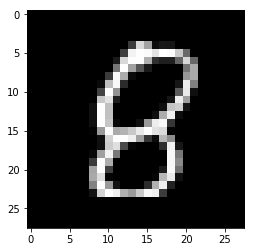

8


In [4]:
def image(img, value):
    mat = img.reshape(28, 28)
    plt.imshow(mat, cmap = "gray")
    plt.show()
    print(value)

image(x_train[440], y_train[440])

## KNN on MNIST

In [5]:
def distance(query_point, any_point):
    dist = np.sqrt(sum((query_point - any_point)**2))
    return dist

def knn(x_train, y_train, query_point, k = 5):
    value = []
    m = x_train.shape[0]
    for i in range(m):
        dist = distance(query_point, x_train[i])
        value.append((dist, y_train[i]))
    sorted_values = sorted(value)
    nearest_k_values = np.array(sorted_values[:k])
    return nearest_k_values

def predict(x_train, y_train, query_point):
    k_values = knn(x_train, y_train, query_point)
    #print(k_values)
    # np.unique returns unique values from the array and return_count = True returns the counts of elements of array 
    values = np.unique(k_values[:, 1], return_counts = True)
    # argmax() returns the index largest numbers from array of counts
    index = values[1].argmax()
    prediction = values[0][index]
    return prediction

pre = predict(x_train, y_train, x_test[4100])
print("The actual value is", y_test[4100])
print("Predicted values using KNN is", int(pre))

The actual value is 7
Predicted values using KNN is 7


## Accuracy on testing set

In [15]:
"""def predict_values(x_train, y_train, x_test):
    m = x_test.shape[0]
    count = 0.0
    predicted_values = []
    for i in range(m):
        val = predict(x_train, y_train, x_test[i])
        #print(val)
        predicted_values.append(val)
        count = count + 1
        print(count)
    return predicted_values

predicted_values = predict_values(x_train, y_train, x_test)"""

'def predict_values(x_train, y_train, x_test):\n    m = x_test.shape[0]\n    count = 0.0\n    predicted_values = []\n    for i in range(m):\n        val = predict(x_train, y_train, x_test[i])\n        #print(val)\n        predicted_values.append(val)\n        count = count + 1\n        print(count)\n    return predicted_values\n\npredicted_values = predict_values(x_train, y_train, x_test)'